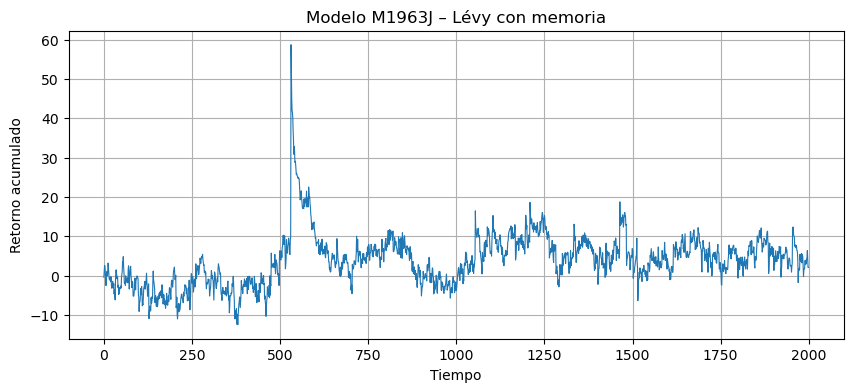

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable

# Parámetros del modelo
alpha = 1.7
beta = 0.0
sigma = 1.0
mu = 0.0
gamma = 0.4
n = 2000

# Simulación de shocks Lévy
np.random.seed(42)
eps = levy_stable.rvs(alpha, beta, loc=mu, scale=sigma, size=n)

# Kernel de memoria (a_k = 1/(k+1)^gamma)
a = np.array([(1/(k+1)**gamma) for k in range(n)])

# Convolución para generar la serie con memoria
serie = np.convolve(eps, a, mode='full')[:n]

# Gráfico
plt.figure(figsize=(10,4))
plt.plot(serie, lw=0.8)
plt.title("Modelo M1963J – Lévy con memoria")
plt.xlabel("Tiempo")
plt.ylabel("Retorno acumulado")
plt.grid(True)
plt.show()

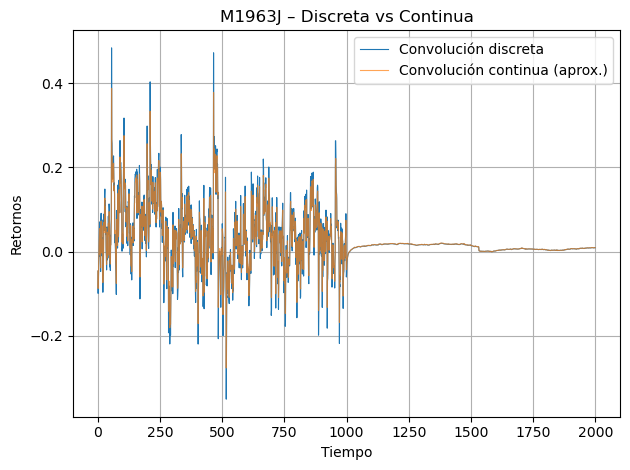

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable
from scipy.integrate import quad

# Parámetros
alpha, beta, sigma, mu = 1.7, 0.0, 1.0, 0.0
gamma, n = 0.7, 2000
np.random.seed(42)

# Ruido Lévy iid
epsilon = levy_stable.rvs(alpha, beta, loc=mu, scale=sigma, size=n)

# Kernel discreto
a_discrete = np.array([(k + 1) ** (-gamma) for k in range(n)])
a_discrete /= np.sum(a_discrete)
serie_discreta = np.convolve(epsilon, a_discrete, mode='same')

# Kernel continuo (aproximado)
a_continuous = np.array([quad(lambda x: x**(-gamma), k, k+1)[0] for k in range(1, n+1)])
a_continuous /= np.sum(a_continuous)
serie_continua = np.convolve(epsilon, a_continuous, mode='same')

# Gráfica
plt.plot(serie_discreta, label='Convolución discreta', lw=0.8)
plt.plot(serie_continua, label='Convolución continua (aprox.)', lw=0.8, alpha=0.7)
plt.title('M1963J – Discreta vs Continua')
plt.xlabel('Tiempo'); plt.ylabel('Retornos'); plt.grid(True)
plt.legend(); plt.tight_layout(); plt.show()